In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import loguniform

In [2]:
# Cargar datos
datos = pd.read_csv("C:/Users/david/segundaEvaluacion/Conjunto de Datos/articulos_ml.csv")

print(datos.head())

                                               Title  \
0  What is Machine Learning and how do we use it ...   
1   10 Companies Using Machine Learning in Cool Ways   
2  How Artificial Intelligence Is Revolutionizing...   
3  Dbrain and the Blockchain of Artificial Intell...   
4  Nasa finds entire solar system filled with eig...   

                                                 url  Word count  # of Links  \
0  https://blog.signals.network/what-is-machine-l...        1888           1   
1                                                NaN        1742           9   
2                                                NaN         962           6   
3                                                NaN        1221           3   
4                                                NaN        2039           1   

   # of comments  # Images video  Elapsed days  # Shares  
0            2.0               2            34    200000  
1            NaN               9             5     25000  
2    

In [3]:
# Eliminar columnas con datos faltantes
datos = datos.dropna()

# Separar las variables independientes (X) y la variable dependiente (y)
X = datos[['Word count', '# of Links']]  # Variables independientes
y = datos['# Shares']  # Variable dependiente


In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Obtener el intercepto (β0) del modelo
print(f'Intercepto: {model.intercept_}')

Intercepto: 6017.623540028642


In [7]:
# Obtener los coeficientes (β1, β2, ...) del modelo para cada variable independiente
print(f'Coeficientes: {model.coef_}')

Coeficientes: [  8.36759872 231.03342141]


In [8]:
# Predecir los valores de la variable dependiente usando los datos de prueba
y_pred = model.predict(X_test)

In [9]:
# Crear un DataFrame para comparar los valores reales y las predicciones
datos_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [10]:
# Mostrar los primeros registros del DataFrame de comparación
print(datos_pred.head())

     Actual     Predicted
155    8707  16298.143029
63      631  14515.844501
41       22   9033.656907
136   16641  13187.245216
152    1824  14804.040683


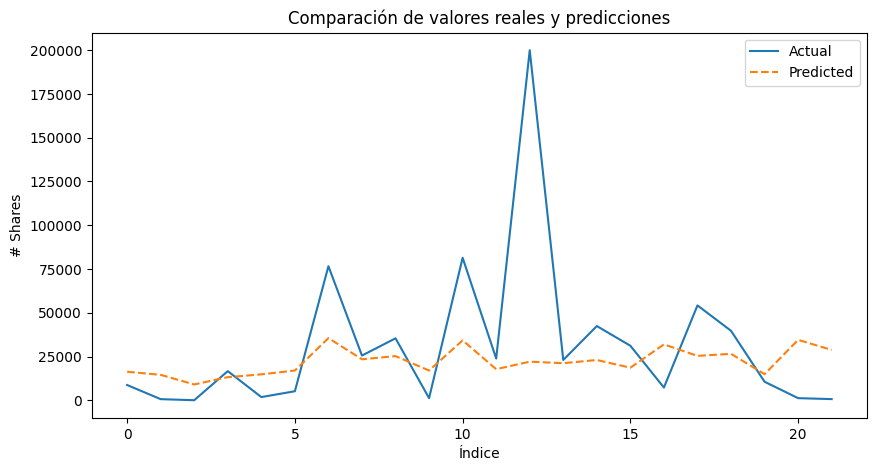

In [11]:
# Visualización de los resultados
plt.figure(figsize=(10,5))
plt.plot(datos_pred['Actual'].values, label='Actual')
plt.plot(datos_pred['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Índice')
plt.ylabel('# Shares')
plt.legend()
plt.title('Comparación de valores reales y predicciones')
plt.show()

In [12]:
# Evaluar el modelo usando diferentes métricas
print(f'Error Absoluto Medio (MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Error Cuadrático Medio (MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'Coeficiente de determinación R²: {metrics.r2_score(y_test, y_pred)}')

Error Absoluto Medio (MAE): 23877.622590427487
Error Cuadrático Medio (MSE): 1849766725.703872
Raíz del Error Cuadrático Medio (RMSE): 43008.91449111303
Coeficiente de determinación R²: 0.028016480012263534


In [13]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [14]:
space = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [15]:
search = GridSearchCV(model, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [16]:
result = search.fit(X_train, y_train)

In [17]:
print(f'Mejor puntuación: {result.best_score_}')
print(f'Mejores Hiperparámetros: {result.best_params_}')

Mejor puntuación: -17587.45882757828
Mejores Hiperparámetros: {'copy_X': True, 'fit_intercept': True, 'positive': True}


In [18]:
model_optimized = LinearRegression(
    fit_intercept=result.best_params_['fit_intercept'], 
    positive=result.best_params_['positive'], 
    copy_X=result.best_params_['copy_X']
)

In [19]:
# Reentrenar el modelo optimizado con los datos de entrenamiento
model_optimized.fit(X_train, y_train)

LinearRegression(positive=True)

In [20]:
# Predecir con el modelo optimizado
y_pred_optimized = model_optimized.predict(X_test)

In [21]:
datos_pred_optimized = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_optimized})

In [22]:
print(datos_pred_optimized.head())

     Actual     Predicted
155    8707  16298.143029
63      631  14515.844501
41       22   9033.656907
136   16641  13187.245216
152    1824  14804.040683


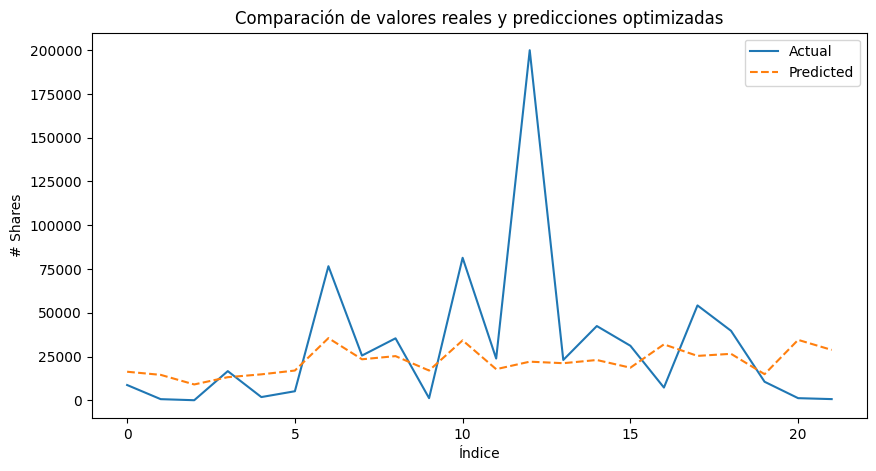

In [23]:
# Visualización de los resultados optimizados
plt.figure(figsize=(10,5))
plt.plot(datos_pred_optimized['Actual'].values, label='Actual')
plt.plot(datos_pred_optimized['Predicted'].values, label='Predicted', linestyle='--')
plt.legend()
plt.xlabel('Índice')
plt.ylabel('# Shares')
plt.title('Comparación de valores reales y predicciones optimizadas')
plt.show()